In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [27]:
 train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Skin Cancer',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
 )

Found 2638 images belonging to 2 classes.


In [28]:
 val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Skin Cancer',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
     )

Found 659 images belonging to 2 classes.


In [29]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
 ])

In [30]:
 model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

In [32]:
 model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH_SIZE)

Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 431s 5s/step - accuracy: 0.7264 - loss: 0.8150 - val_accuracy: 0.7997 - val_loss: 0.5119
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.8042 - loss: 0.5030 - val_accuracy: 0.7997 - val_loss: 0.5032
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.7974 - loss: 0.5109 - val_accuracy: 0.7997 - val_loss: 0.4984
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.7981 - loss: 0.5099 - val_accuracy: 0.7997 - val_loss: 0.4995
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.8039 - loss: 0.4985 - val_accuracy: 0.7997 - val_loss: 0.5135


In [33]:
 model.save('/content/drive/MyDrive/Skin Cancer/Skin Cancer.h5')

In [34]:
 model = load_model('/content/drive/MyDrive/BrainTumor/BrainTumor.h5')
 print("Model Loaded")


Model Loaded


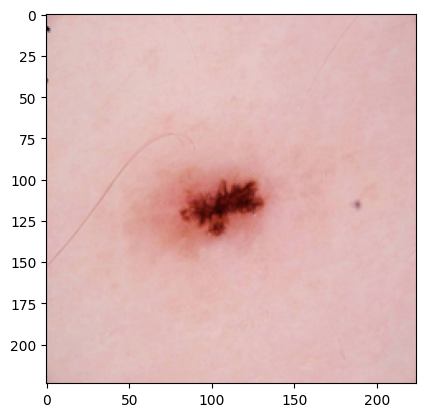

In [40]:
test_image_path="/content/drive/MyDrive/Skin Cancer/test/benign/1.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [41]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.


In [42]:
 prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [43]:
 print(prediction)

[[0.70522213]]


In [44]:
if prediction >=0.5:
    print("The person was cancerous")
else:
    print("The person was non - cancerous")

The person was cancerous
